<a href="https://colab.research.google.com/github/rani-sikdar/GenAI-complete-course-codes/blob/main/topic_modelling_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Topic Modeling

Topic modeling is a type of statistical modeling for discovering the abstract "topics" that occur in a collection of documents. It's a frequently used text-mining tool for discovery of hidden semantic structures in a text body.

Essentially, topic modeling algorithms analyze the words in a set of documents and identify groups of words that frequently appear together. These groups of words are assumed to represent underlying topics. For example, in a collection of news articles, a topic modeling algorithm might identify a topic related to "politics" by finding that words like "government," "election," "senate," and "president" often appear together in the same documents.

Topic modeling is useful for:

*   **Summarizing large collections of text:** By identifying the main topics, you can get a high-level understanding of the content without reading every document.
*   **Discovering hidden themes:** It can reveal underlying themes and patterns that might not be immediately obvious.
*   **Organizing and searching documents:** Documents can be grouped or searched based on their dominant topics.
*   **Feature extraction for other tasks:** The topic distributions of documents can be used as features for tasks like document classification or clustering.

Some popular topic modeling techniques include Latent Semantic Analysis (LSA), Latent Dirichlet Allocation (LDA), and Non-Negative Matrix Factorization (NMF), which are explored in this notebook.

In [ ]:
#@title Data preparation

# Creating example documents
doc_1 = "A whopping 96.5 percent of water on Earth is in our oceans, covering 71 percent of the surface of our planet. And at any given time, about 0.001 percent is floating above us in the atmosphere. If all of that water fell as rain at once, the whole planet would get about 1 inch of rain."

doc_2 = "One-third of your life is spent sleeping. Sleeping 7-9 hours each night should help your body heal itself, activate the immune system, and give your heart a break. Beyond that--sleep experts are still trying to learn more about what happens once we fall asleep."

doc_3 = "A newborn baby is 78 percent water. Adults are 55-60 percent water. Water is involved in just about everything our body does."

doc_4 = "While still in high school, a student went 264.4 hours without sleep, for which he won first place in the 10th Annual Great San Diego Science Fair in 1964."

doc_5 = "We experience water in all three states: solid ice, liquid water, and gas water vapor."

doc_6 = "Oceans absorb carbon dioxide, playing a major role in regulating the global climate. Chronic sleep disorders can be linked to heart disease, obesity, and diabetes.Hydration is key to maintaining energy, brain function, and body temperature."

doc_7 = "Napping for 10-30 minutes can boost alertness without affecting night sleep.Sleeping 7-9 hours each night should help your body heal itself, activate the immune system, and give your heart a break. One-third of your life is spent sleeping."

doc_8 = "Glaciers store about 69% of the world’s freshwater, slowly releasing it over time. If all of that water fell as rain at once, the whole planet would get about 1 inch of rain."

doc_9 = "Clouds are composed of tiny water droplets or ice crystals suspended in the sky."

doc_10 = "The human brain is around 75% water, playing a crucial role in neural transmission. Dreams typically occur during REM sleep and can be influenced by daily experiences and stress."

# Create corpus
corpus = [doc_1, doc_2, doc_3, doc_4, doc_5, doc_6, doc_7, doc_8, doc_9, doc_10]

In [ ]:
corpus

In [ ]:
import nltk
nltk.download('all')

In [ ]:
#@title data preprocessing

import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string

# remove stopwords, punctuation, and normalize the corpus
stopwords_ = set(stopwords.words('english'))
punctuation_ = set(string.punctuation)
lemma = WordNetLemmatizer()

def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stopwords_])
    punc_free = "".join(ch for ch in stop_free if ch not in punctuation_)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

clean_corpus = [clean(doc).split() for doc in corpus]

In [ ]:
clean_corpus

[['whopping',
  '965',
  'percent',
  'water',
  'earth',
  'ocean',
  'covering',
  '71',
  'percent',
  'surface',
  'planet',
  'given',
  'time',
  '0001',
  'percent',
  'floating',
  'u',
  'atmosphere',
  'water',
  'fell',
  'rain',
  'once',
  'whole',
  'planet',
  'would',
  'get',
  '1',
  'inch',
  'rain'],
 ['onethird',
  'life',
  'spent',
  'sleeping',
  'sleeping',
  '79',
  'hour',
  'night',
  'help',
  'body',
  'heal',
  'itself',
  'activate',
  'immune',
  'system',
  'give',
  'heart',
  'break',
  'beyond',
  'thatsleep',
  'expert',
  'still',
  'trying',
  'learn',
  'happens',
  'fall',
  'asleep'],
 ['newborn',
  'baby',
  '78',
  'percent',
  'water',
  'adult',
  '5560',
  'percent',
  'water',
  'water',
  'involved',
  'everything',
  'body',
  'doe'],
 ['still',
  'high',
  'school',
  'student',
  'went',
  '2644',
  'hour',
  'without',
  'sleep',
  'first',
  'place',
  '10th',
  'annual',
  'great',
  'san',
  'diego',
  'science',
  'fair',
  '196

_Before we can use this data as input to a `LDA or LSA model`, it must be converted to a `term-document matrix`. A term-document matrix is merely a mathematical representation of a set of documents and the terms contained within them._

It’s created by counting the **occurrence of every term in each document** and then normalizing the counts to create a matrix of values that can be used for analysis.

In [ ]:
pip install --no-cache-dir numpy scipy gensim

### Latent Semantic Analysis (LSA)

Latent Semantic Analysis (LSA), also known as Latent Semantic Indexing (LSI), is an early technique used in topic modeling and information retrieval. It uses a mathematical technique called Singular Value Decomposition (SVD) to reduce the dimensionality of a document-term matrix.

**How LSA Works for Topic Modeling:**

1.  **Document-Term Matrix:** LSA starts with a document-term matrix, where rows represent documents and columns represent terms (words), and the values indicate the frequency or TF-IDF score of a term in a document.
2.  **Singular Value Decomposition (SVD):** SVD decomposes the document-term matrix into three smaller matrices:
    *   A document-topic matrix.
    *   A singular value matrix (representing the strength of each topic).
    *   A topic-term matrix.
3.  **Dimensionality Reduction:** By keeping only the top k singular values and their corresponding vectors, LSA creates a lower-dimensional representation of the document-term matrix. These k dimensions are interpreted as "topics."

**Key Characteristics of LSA in Topic Modeling:**

*   **Dimensionality Reduction:** LSA is primarily a dimensionality reduction technique that can reveal underlying semantic relationships between words and documents.
*   **Identification of Synonyms and Polysemy:** By grouping related words and documents, LSA can help identify synonyms and handle polysemy (words with multiple meanings) to some extent.
*   **Interpretability:** The resulting topics in LSA can sometimes be less interpretable than those from methods like LDA or NMF, as the values in the matrices can be negative.

LSA is a foundational technique that paved the way for more advanced topic modeling methods.

In [ ]:
#@title Modeling LSA with LSIModel

from gensim.models import LsiModel

dictionary = corpora.Dictionary(clean_corpus)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_corpus]

lsa = LsiModel(doc_term_matrix, id2word=dictionary, num_topics=3)
lsa.print_topics(num_topics=3, num_words=3)

# This outputs the topics (each line) with individual topic terms (terms) and their weights.

[(0, '0.533*"water" + 0.408*"percent" + 0.310*"rain"'),
 (1, '-0.302*"sleeping" + -0.299*"night" + -0.220*"body"'),
 (2, '-0.270*"water" + -0.250*"sleep" + -0.231*"role"')]

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

"""
TfidfVectorizer expects an input where each element is a string (a document).
Currently, it's receiving clean_corpus, which is a list of lists of words.
"""

clean_corpus_strings = [" ".join(doc) for doc in clean_corpus]

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=500)
tfidf_data = vectorizer.fit_transform(clean_corpus_strings)

lsa = TruncatedSVD(n_components=5, random_state=42)
lsa.fit(tfidf_data)

TruncatedSVD(n_components=5, random_state=42)

In [ ]:
#@title view top words per topic
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words=5):
    for idx, component in enumerate(model.components_):
        top_terms = [feature_names[i] for i in component.argsort()[:-no_top_words - 1:-1]]
        print(f"Topic {idx + 1}: {' | '.join(top_terms)}")

display_topics(lsa, feature_names, no_top_words=7)

Topic 1: water | percent | rain | planet | fell | inch | time
Topic 2: night | sleeping | help | immune | spent | activate | onethird
Topic 3: rain | planet | fell | inch | time | percent | world
Topic 4: ice | water | sky | suspended | droplet | crystal | composed
Topic 5: 10th | 1964 | diego | annual | san | school | science


In [ ]:
#@title Get Document-Topic Matrix

from gensim import corpora

doc_topic_matrix = lsa.transform(tfidf_data)
print(doc_topic_matrix.shape)  # Should be (n_docs, n_components)
print(doc_term_matrix[0])

(10, 5)
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 2), (16, 2), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1)]


In [ ]:
print("Explained variance per topic:",lsa.explained_variance_ratio_)
print("Total explained variance:", lsa.explained_variance_ratio_.sum())

from sklearn.metrics.pairwise import cosine_similarity

similarity_matrix = cosine_similarity(doc_topic_matrix)
print(similarity_matrix[:5])  # Show similarities between first 5 docs

Explained variance per topic: [0.05284333 0.17313327 0.13030689 0.12674935 0.1120519 ]
Total explained variance: 0.5950847446661695
[[ 1.         -0.00129258  0.74893656 -0.00324292  0.26481624  0.04579673
  -0.00129258  0.9684623  -0.02082238  0.03311695]
 [-0.00129258  1.          0.08693841  0.04121313 -0.00950324  0.10831325
   1.         -0.01923406  0.00334805 -0.04477883]
 [ 0.74893656  0.08693841  1.         -0.07028899  0.82784509  0.03529337
   0.08693841  0.56300093  0.60216448  0.27363959]
 [-0.00324292  0.04121313 -0.07028899  1.         -0.0127905   0.01257152
   0.04121313  0.04915212  0.05065463  0.09413886]
 [ 0.26481624 -0.00950324  0.82784509 -0.0127905   1.         -0.00313556
  -0.00950324  0.02433032  0.91184369  0.38928004]]


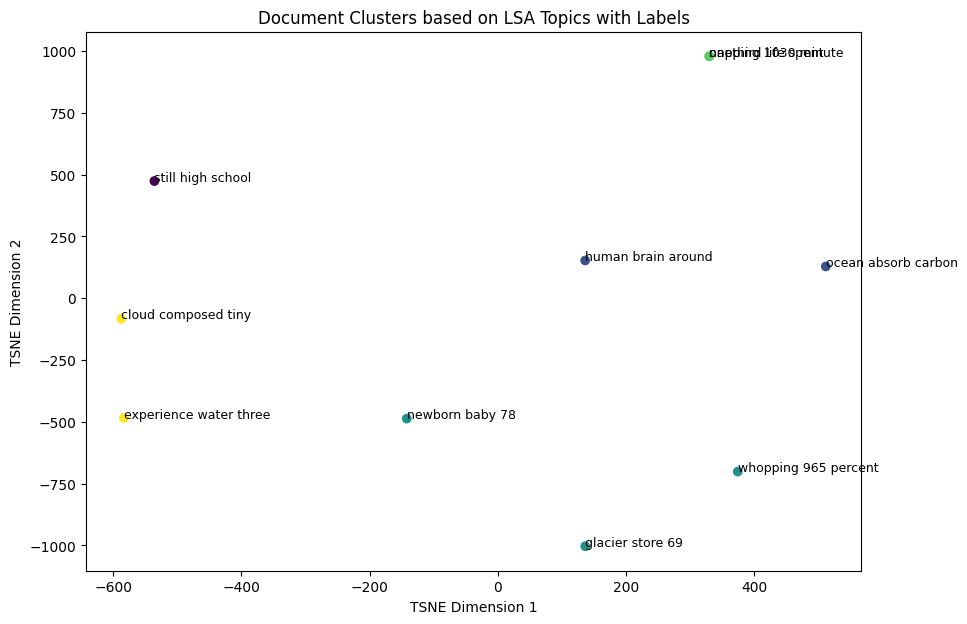

In [ ]:
#@title visualising the data through clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(doc_topic_matrix)

# Optional: Short labels (first 3 words of each doc)
labels = [" ".join(doc[:3]) for doc in clean_corpus]  # Clean_corpus is tokenized

plt.figure(figsize=(10, 7))
plt.scatter(tsne_values[:, 0], tsne_values[:, 1], c=clusters, cmap='viridis')

# Add text labels to each point
for i, label in enumerate(labels):
    plt.text(tsne_values[i, 0]+0.1, tsne_values[i, 1]+0.1, label, fontsize=9)

plt.title("Document Clusters based on LSA Topics with Labels")
plt.xlabel("TSNE Dimension 1")
plt.ylabel("TSNE Dimension 2")
plt.show()

### Latent Dirichlet Allocation (LDA)

Latent Dirichlet Allocation (LDA) is a generative probabilistic model for collections of discrete data such as text corpora. It's one of the most popular and widely used topic modeling techniques.

**How LDA Works for Topic Modeling:**

LDA assumes that each document is a mixture of a small number of topics and that each word in the document is generated from one of the document's topics. The model works by trying to infer the underlying topic structure based on the observed words in the documents.

The core idea is based on these assumptions:

1.  Each document is a mixture of topics.
2.  Each topic is a mixture of words.

LDA uses Dirichlet distributions as prior probabilities for the topic distribution in documents and the word distribution in topics. The algorithm then uses techniques like Gibbs sampling or Variational Inference to estimate the parameters of these distributions, effectively discovering the topics and the topic composition of each document.

**Key Characteristics of LDA in Topic Modeling:**

*   **Generative Model:** LDA provides a probabilistic framework for understanding how documents are generated from topics and how topics are composed of words.
*   **Probabilistic Topic Assignments:** Each document has a probability distribution over topics, and each word in a document is assigned to a topic with a certain probability.
*   **Interpretability:** LDA often produces topics that are relatively interpretable, as the output includes the most probable words for each topic.
*   **Hyperparameters:** LDA has hyperparameters (like alpha and beta) that influence the sparsity of topic distributions in documents and word distributions in topics, allowing for some control over the model's behavior.

LDA is a powerful tool for discovering abstract topics in text and has been widely applied in various domains.

### LDA(Latent Dirichlet Allocation)

In [ ]:
#@title Modelling- LDA

from gensim.models import LdaModel

lda = LdaModel(doc_term_matrix, num_topics=3, id2word = dictionary)

In [ ]:
lda.print_topics(num_topics=5, num_words=3)

[(0, '0.031*"rain" + 0.028*"water" + 0.024*"planet"'),
 (1, '0.059*"water" + 0.024*"percent" + 0.020*"body"'),
 (2, '0.027*"night" + 0.018*"sleeping" + 0.017*"79"')]


There are three hyperparameters in LDA

α → document density factor (represents document-topic density factor)  
β → topic word density factor (represents word density in a topic)  
K → number of topics selected (number of components representing the number of topics we want the document to be clustered or divided into parts)

The α hyperparameter controls the number of topic expected in the document. The β hyperparameter controls the distribution of words per topic in the document, and K defines how many topics we need to extract.

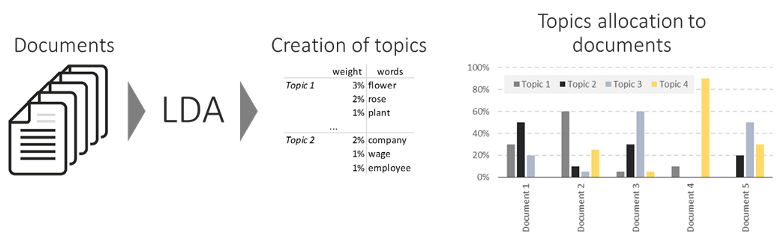

To use scikit-learn's `LatentDirichletAllocation`, we need to create a document-term matrix using scikit-learn's vectorizers.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the cleaned tokens back into strings for CountVectorizer
clean_corpus_strings = [" ".join(doc) for doc in clean_corpus]

# Create a document-term matrix using CountVectorizer
vectorizer = CountVectorizer()
sklearn_doc_term_matrix = vectorizer.fit_transform(clean_corpus_strings)

print("Shape of scikit-learn document-term matrix:", sklearn_doc_term_matrix.shape)

Shape of scikit-learn document-term matrix: (10, 136)


Now we can use this matrix with `LatentDirichletAllocation` and `GridSearchCV`.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

# Define the parameter grid
grid_params = {'n_components' : list(range(2, 6))} # Reduced range for this example

# LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)

# GridSearchCV for hyperparameter tuning
lda_model = GridSearchCV(lda, param_grid=grid_params)
lda_model.fit(sklearn_doc_term_matrix)

# Estimators for LDA model
lda_model1 = lda_model.best_estimator_
print("Best LDA model's params:" , lda_model.best_params_)
print("Best log likelihood Score for the LDA model:", lda_model.best_score_)
print("LDA model Perplexity on train data:", lda_model1.perplexity(sklearn_doc_term_matrix))

Best LDA model's params: {'n_components': 2}
Best log likelihood Score for the LDA model: -297.56677431631937
LDA model Perplexity on train data: 176.82173761862663


In [ ]:
vectorizer.get_feature_names_out()

array(['0001', '1030', '10th', '1964', '2644', '5560', '69', '71', '75',
       '78', '79', '965', 'absorb', 'activate', 'adult', 'affecting',
       'alertness', 'annual', 'around', 'asleep', 'atmosphere', 'baby',
       'beyond', 'body', 'boost', 'brain', 'break', 'carbon', 'chronic',
       'climate', 'cloud', 'composed', 'covering', 'crucial', 'crystal',
       'daily', 'diabeteshydration', 'diego', 'dioxide', 'disease',
       'disorder', 'doe', 'dream', 'droplet', 'earth', 'energy',
       'everything', 'experience', 'expert', 'fair', 'fall', 'fell',
       'first', 'floating', 'freshwater', 'function', 'gas', 'get',
       'give', 'given', 'glacier', 'global', 'great', 'happens', 'heal',
       'heart', 'help', 'high', 'hour', 'human', 'ice', 'immune', 'inch',
       'influenced', 'involved', 'itself', 'key', 'learn', 'life',
       'linked', 'liquid', 'maintaining', 'major', 'minute', 'napping',
       'neural', 'newborn', 'night', 'obesity', 'occur', 'ocean', 'once',
       'o

In [ ]:
# Access the best estimator from GridSearchCV and then its components_
best_lda_model = lda_model.best_estimator_
print(best_lda_model.components_)

In [ ]:
# Use LDA to look for 12 topics
n_topics = 5

# Print the top 10 words per topic
n_words = 5
feature_names = vectorizer.get_feature_names_out()

topic_list = []
for topic_idx, topic in enumerate(best_lda_model.components_):
    top_n = [feature_names[i]
              for i in topic.argsort()
               [-n_words:]][::-1]

    top_features = ' '.join(top_n)

    topic_list.append(f"topic_{'_'.join(top_n[:3])}")

    print(f"Topic {topic_idx}: {top_features}")

topic_result = lda_model.transform(sklearn_doc_term_matrix)
# df['topic']  = topic_result.argmax(axis=1)

Topic 0: water sleep brain playing role
Topic 1: rain percent sleeping night planet


In [ ]:
pip install WordCloud

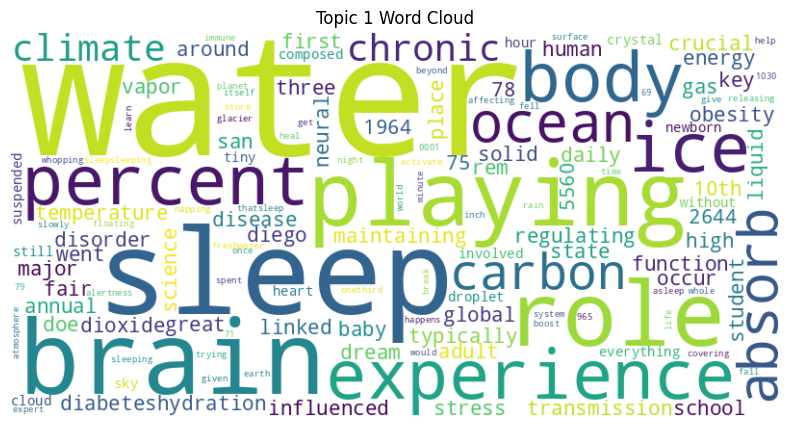

<Figure size 1000x600 with 0 Axes>

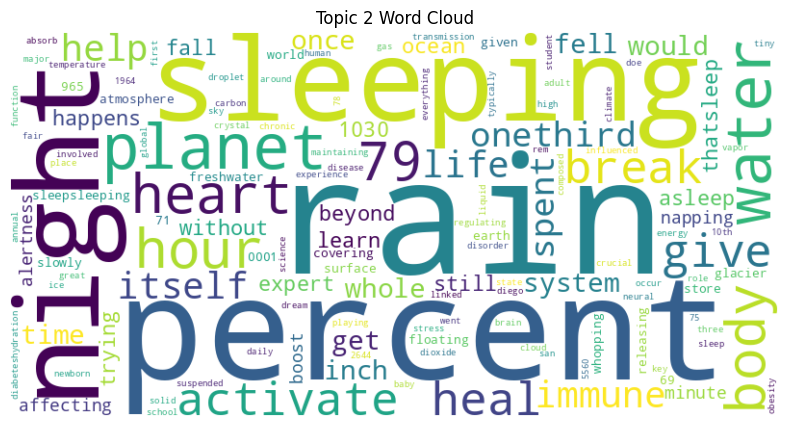

<Figure size 1000x600 with 0 Axes>

In [ ]:
#@title topic visuals - WordCloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Get the topic-word distributions from the best LDA model
topic_word_distributions = best_lda_model.components_

# Get the feature names (words) from the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Generate and display a WordCloud for each topic
for topic_idx, topic in enumerate(topic_word_distributions):
    # Create a dictionary of word frequencies for the topic
    word_frequencies = {feature_names[i]: topic[i] for i in range(len(feature_names))}

    # Generate the WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies)

    # Display the WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {topic_idx + 1} Word Cloud")
    plt.figure(figsize=(10, 6))
    plt.show()

### Non-Negative Matrix Factorization (NMF)

Non-Negative Matrix Factorization (NMF) is another technique used for topic modeling, particularly effective for dimensionality reduction and identifying latent topics in textual data. Unlike LSA which uses Singular Value Decomposition (SVD) and can result in negative values, NMF constrains the matrices to be non-negative, which can lead to more interpretable results in the context of topic modeling where word and topic contributions are inherently non-negative.

**How NMF Works for Topic Modeling:**

NMF decomposes a non-negative document-term matrix (where values represent word frequencies or TF-IDF scores) into two smaller non-negative matrices:

1.  **W (Document-Topic Matrix):** This matrix represents the extent to which each document belongs to each topic. Each row corresponds to a document, and each column corresponds to a topic.
2.  **H (Topic-Word Matrix):** This matrix represents the extent to which each word contributes to each topic. Each row corresponds to a topic, and each column corresponds to a word in the vocabulary.

The original document-term matrix is approximated by the product of these two matrices (V ≈ WH). The factorization process iteratively adjusts the values in W and H to minimize the difference between V and WH, while ensuring all values remain non-negative.

**Key Characteristics of NMF in Topic Modeling:**

*   **Non-Negativity:** The non-negativity constraint makes the resulting matrices (W and H) more interpretable. The values in W can be seen as the "strength" of each topic in a document, and the values in H can be seen as the "importance" of each word in a topic.
*   **Interpretability:** The non-negative nature often leads to topics that are easier to understand, as words with positive weights are directly associated with a topic.
*   **Dimensionality Reduction:** Like LSA and LDA, NMF reduces the high-dimensional document-term matrix into lower-dimensional representations (W and H), capturing the underlying topic structure.

NMF is a powerful alternative to LSA and LDA, especially when interpretability of the topics is a key concern.

In [ ]:
#@title NMF -
# Importing Necessary packages

import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

In [ ]:
# Importing Data
text_data= fetch_20newsgroups(remove=('headers', 'footers', 'quotes')).data
text_data[:3]

['I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.',
 "A fair number of brave souls who upgraded their SI clock oscillator have\nshared their experiences for this poll. Please send a brief message detailing\nyour experiences with the procedure. Top speed attained, CPU rated speed,\nadd on cards and adapters, heat sinks, hour of usage per day, floppy disk\nfunctionality with 800 and 1.4 m floppies are especially requested.\n\nI will be summarizing in the next two days, so please add to the network\nknowledge base if you have done the clock upgrade and haven't an

In [ ]:
len(text_data)

11314

In [ ]:
# converting the given text term-document matrix

vectorizer = TfidfVectorizer(max_features=1500, min_df=10, stop_words='english')
X = vectorizer.fit_transform(text_data)
words = np.array(vectorizer.get_feature_names_out())

print(X)
print("X = ", words)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 339764 stored elements and shape (11314, 1500)>
  Coords	Values
  (0, 1472)	0.18550765645757622
  (0, 278)	0.6305581416061171
  (0, 1191)	0.17201525862610717
  (0, 411)	0.1424921558904033
  (0, 469)	0.20099797303395192
  (0, 807)	0.183033665833931
  (0, 766)	0.18711856186440218
  (0, 484)	0.1714763727922697
  (0, 273)	0.14279390121865665
  (0, 1118)	0.12154002727766958
  (0, 1256)	0.15350324219124503
  (0, 128)	0.190572546028195
  (0, 1218)	0.19781957502373115
  (0, 1158)	0.16511514318854434
  (0, 247)	0.17513150125349705
  (0, 756)	0.09424560560725694
  (0, 886)	0.176487811904008
  (0, 506)	0.1941399556509409
  (0, 1495)	0.1274990882101728
  (0, 672)	0.169271507288906
  (0, 707)	0.16068505607893965
  (0, 808)	0.1439640091285723
  (0, 828)	0.1359651513113477
  (1, 411)	0.14622796373696134
  (1, 546)	0.20534935893537723
  :	:
  (11312, 1486)	0.183845539553728
  (11312, 1409)	0.2006451645457405
  (11312, 925)	0.245800989004514

In [ ]:
# Applying Non-Negative Matrix Factorization

nmf = NMF(n_components=10, solver="mu", random_state=123)
nmf.fit(tfidf_data)

W = nmf.fit_transform(X)
H = nmf.components_

for i, topic in enumerate(H):
     print("Topic {}: {}".format(i + 1, ",".join([str(x) for x in words[topic.argsort()[-10:]]])))

Topic 1: want,really,time,ve,good,know,think,like,just,don
Topic 2: help,anybody,info,looking,hi,mail,advance,know,does,thanks
Topic 3: does,church,christians,christian,faith,christ,believe,bible,jesus,god
Topic 4: league,win,hockey,play,players,season,games,year,team,game
Topic 5: bus,floppy,ide,controller,hard,drives,disk,card,scsi,drive
Topic 6: car,shipping,condition,offer,price,space,10,sale,00,new
Topic 7: running,problem,using,program,use,window,files,dos,file,windows
Topic 8: public,algorithm,escrow,government,use,keys,clipper,encryption,chip,key
Topic 9: rights,said,armenians,state,armenian,jews,israeli,government,israel,people
Topic 10: send,internet,ftp,email,article,university,com,cs,soon,edu


In [ ]:
print(W[:10,:10])

[[2.36841730e-02 2.58306906e-02 8.13271190e-12 3.84210766e-04
  1.83127156e-16 3.96615674e-02 1.57451729e-23 3.95399888e-15
  2.51748604e-06 1.04900498e-20]
 [3.59011016e-03 2.54505172e-02 2.89536304e-04 1.83256709e-03
  3.40572411e-02 9.97025378e-03 5.19138467e-12 6.60087579e-03
  4.48273440e-06 1.46600884e-03]
 [5.86896961e-02 6.08521567e-02 8.55926572e-06 9.02409349e-03
  1.52133609e-02 1.96917906e-03 3.54626231e-03 2.48943372e-03
  3.63455677e-06 2.12515467e-02]
 [2.90675855e-03 2.45940450e-02 7.71372361e-66 9.25586482e-33
  1.30040752e-19 1.43417102e-02 1.95877311e-37 8.73594849e-02
  5.79311242e-22 1.05060278e-15]
 [3.15388053e-02 1.39899361e-04 2.84909687e-03 2.26965950e-14
  8.73274367e-05 2.33897940e-02 1.12732293e-02 4.20328625e-11
  4.60539726e-03 1.45742494e-02]
 [9.29558914e-03 1.17761728e-15 6.06960524e-03 6.14915479e-15
  8.70680408e-12 2.30005865e-03 8.57282913e-03 4.27616245e-03
  2.33992833e-02 5.34979163e-03]
 [9.65974736e-04 5.92514025e-02 1.89816751e-07 5.20679877e

In [ ]:
W.shape

(11314, 10)

In [ ]:
print(H[:10,:10])

[[1.65818038e-026 3.70006643e-005 8.84674217e-010 2.79833976e-003
  3.11542935e-011 1.23047621e-011 4.40581847e-014 2.27513336e-009
  8.81644190e-099 8.26501524e-074]
 [3.24936545e-019 2.81286727e-015 1.17106745e-015 2.84190443e-014
  4.10575030e-005 5.04264732e-008 2.36583996e-006 4.19423946e-015
  4.37022954e-049 8.48909735e-062]
 [8.43709118e-041 4.98044963e-030 1.61037429e-027 3.38380624e-003
  9.05716558e-015 1.06639358e-017 4.80419504e-019 2.07576800e-018
  2.19528251e-135 6.10483516e-136]
 [1.20525500e-016 4.57053429e-002 5.75739183e-004 4.85627831e-003
  2.37855568e-003 1.72926734e-007 1.59243415e-003 5.42306487e-005
  1.47748510e-011 7.80674582e-011]
 [2.35150587e-019 1.42908047e-004 2.61620026e-016 8.78316216e-003
  1.92949073e-010 5.15606150e-004 3.30008687e-003 1.56763737e-022
  1.81799719e-012 1.27787088e-015]
 [9.37164045e-001 2.68477497e-001 7.21016408e-002 4.66085209e-002
  3.18840347e-002 6.32627926e-002 3.96672006e-002 3.68514833e-002
  4.08755586e-003 2.24071285e-003

In [ ]:
H.shape

(10, 1500)